## Segements and events selection

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import transport_signal_processing as tsp
from data_manager import DataManager
from selection import segments_selection, events_selection
from plot_utils import plot_selected_segments, plot_selected_events

### Selecting data to process

In [51]:
# parameter
path = "3MGdmClpH4_PNA_400uM_K238A_25C_110mV"

sel_key = "id"
re_sel = ""


# setup database connector
sigman = DataManager('database', safe=False)

# load segments informations
sinfo_l = sigman.load_info(path, 's*')

# convert info to dataframe
df = pd.DataFrame(sinfo_l).fillna(0.0).query("N_cores >= 1").sort_values("N_cores", ascending=False)
display(df)

# debug print
keys = np.unique(df[sel_key].values)
print(keys.shape[0], list(keys))

,condition,analyte,concentration,pore,temperature,voltage,date,channel,id,sid,segment_range,segment_duration,MODIFIED,mI_open,sI_open,N_events,N_cores,N_reduced,selected,ratio_sel
486,3MGdmClpH4,PNA,400,K238A,25,110,24082023,002,8,3,"[22945190, 36488959]",135.43769,2023-08-25_17:34:20,176.253073,6.169144,7935,3121.0,3121.0,1.0,0.140980
483,3MGdmClpH4,PNA,400,K238A,25,110,24082023,002,8,0,"[0, 10055515]",100.55515,2023-08-25_17:34:20,176.430694,6.047275,5619,2164.0,2164.0,1.0,0.117837
192,3MGdmClpH4,PNA,400,K238A,25,110,23082023,001,10-0,113,"[51109647, 54505945]",33.96298,2023-08-25_17:34:18,218.082408,6.341293,4164,2005.0,2005.0,1.0,0.010973
216,3MGdmClpH4,PNA,400,K238A,25,110,23082023,001,10-0,137,"[66746675, 68715134]",19.68459,2023-08-25_17:34:18,218.221208,6.327420,3991,1920.0,1920.0,1.0,0.020313
484,3MGdmClpH4,PNA,400,K238A,25,110,24082023,002,8,1,"[10107742, 19580399]",94.72657,2023-08-25_17:34:20,176.319055,6.098057,4928,1907.0,1907.0,1.0,0.128998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3MGdmClpH4,PNA,400,K238A,25,110,23082023,001,10-0,38,"[16807653, 17087551]",2.79898,2023-08-25_17:33:16,26.484800,6.170387,2,2.0,2.0,0.0,0.000000
387,3MGdmClpH4,PNA,400,K238A,25,110,23082023,003,10-1,111,"[50353372, 50786773]",4.33401,2023-08-25_17:33:16,129.698495,8.112622,2,2.0,2.0,0.0,1.000000
143,3MGdmClpH4,PNA,400,K238A,25,110,23082023,001,10-0,64,"[29472702, 29884605]",4.11903,2023-08-25_17:33:16,31.379009,6.441350,4,1.0,1.0,0.0,0.000000
139,3MGdmClpH4,PNA,400,K238A,25,110,23082023,001,10-0,60,"[27269637, 27726527]",4.56890,2023-08-25_17:33:16,27.823750,7.445212,2,1.0,1.0,0.0,0.000000


5 ['10-0', '10-1', '10-2', '7', '8']


### 1. Segments selection

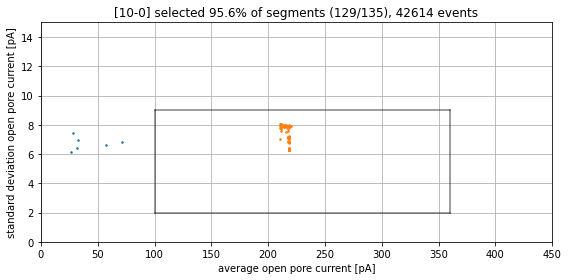

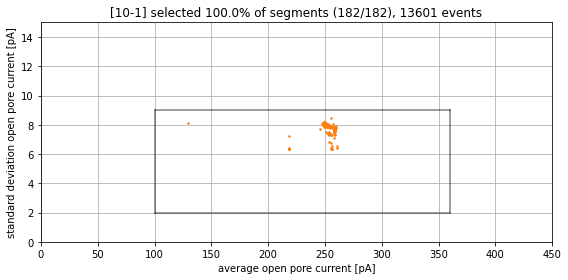

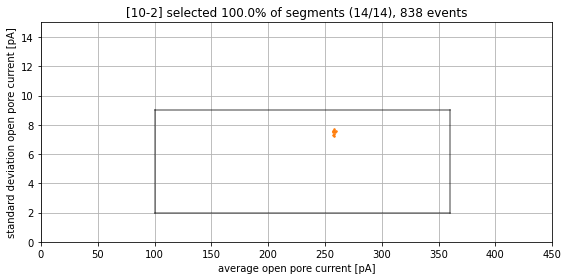

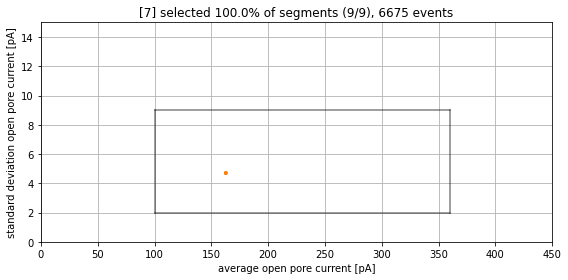

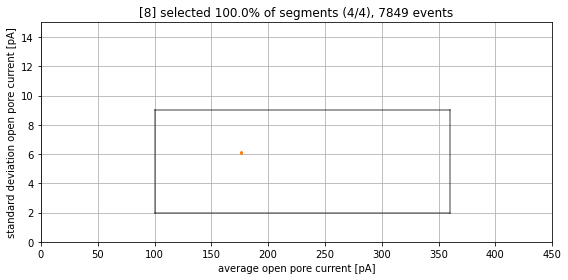

In [52]:
# parameters
params = {
    'general': {'mI_open_lims':[100, 360], 'sI_open_lims':[2, 9]},
    '90': {'mI_open_lims':[200, 250], 'sI_open_lims':[2, 15]},
    '100': {'mI_open_lims':[120, 160], 'sI_open_lims':[2, 15]},
    '110': {'mI_open_lims':[130, 300], 'sI_open_lims':[2, 15]},
    '120': {'mI_open_lims':[140, 180], 'sI_open_lims':[2, 15]},
    '140': {'mI_open_lims':[140, 210], 'sI_open_lims':[2, 15]},
    '160': {'mI_open_lims':[150, 220], 'sI_open_lims':[2, 15]},
    '180': {'mI_open_lims':[160, 230], 'sI_open_lims':[2, 15]},
    '200': {'mI_open_lims':[170, 240], 'sI_open_lims':[2, 15]}
}

# for all subsets
for key in keys:
    # get parameters
    mI_open_lims = params["general"]['mI_open_lims']
    sI_open_lims = params["general"]['sI_open_lims']
    
    # get segments information
    dfs = df[df[sel_key] == key]
    sinfo_l = dfs.to_dict("records")

    # select segments
    m = segments_selection(sigman, sinfo_l, mI_open_lims, sI_open_lims)

    # extract selected data and statistics
    n_sel = np.sum(m)
    N_sigs = m.shape[0]
    p_sel = 100.0 * float(n_sel) / float(N_sigs)
    N_events = int(np.sum(dfs[m]['N_cores'].values))

    # plot
    plt.figure(figsize=(8,4))
    plot_selected_segments(dfs['mI_open'].values, dfs['sI_open'].values, mI_open_lims, sI_open_lims, m)
    plt.xlabel('average open pore current [pA]')
    plt.ylabel('standard deviation open pore current [pA]')
    plt.title('[{}] selected {:.1f}% of segments ({}/{}), {} events'.format(key, p_sel, n_sel, N_sigs, N_events))
    plt.xlim(0.0, 450.0)
    plt.ylim(0.0, 15.0)
    plt.grid()
    plt.tight_layout()
    plt.show()

### 2. Events selection

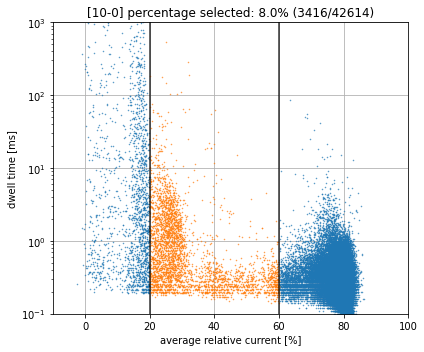

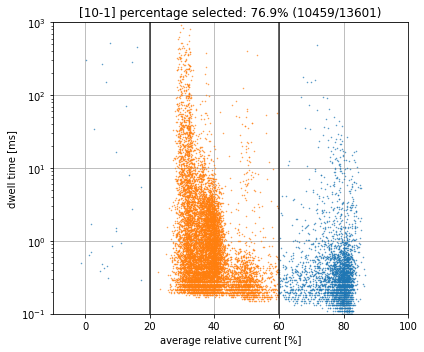

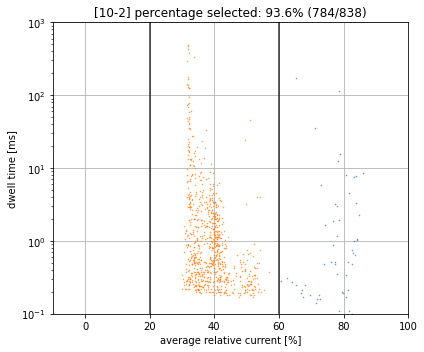

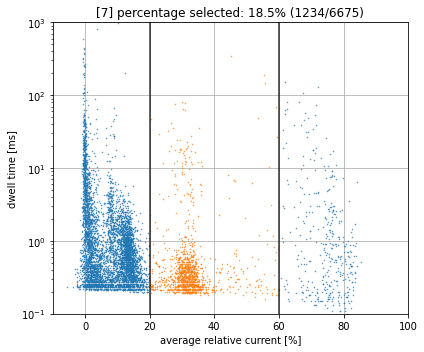

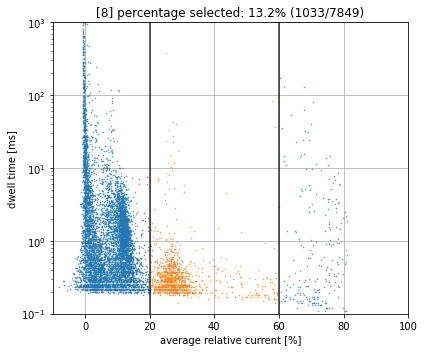

In [53]:
# parameters
# I_lims: limits of the current given in percent of blockade of the open pore, 100% = open pore, 0% = blocked pore
# t_lims: limits of the dwell time [ms]
params = {
    'general': {'I_lims':[20,60], 't_lims':[0.01, 10000]},
    '90': {'I_lims':[0,100], 't_lims':[0.01, 10000]},
    '100': {'I_lims':[0, 100], 't_lims':[0.01, 10000]},
    '120': {'I_lims':[0, 100], 't_lims':[0.01, 10000]},
    '140': {'I_lims':[0,100], 't_lims':[0.01, 10000]},
    '160': {'I_lims':[0,100], 't_lims':[0.01, 10000]},
    '180': {'I_lims':[-10,100], 't_lims':[1, 10000]},
}

# for all subsets
for key in keys:
    # get parameters
    I_lims = params['general']['I_lims']
    t_lims = params['general']['t_lims']
    
    # reload segments informations
    sinfo_l = sigman.load_info(path, 's*')
    dfs = pd.DataFrame(sinfo_l).query("selected > 0")
    
    # get segments information
    sinfo_l = dfs[dfs[sel_key] == key].to_dict("records")

    # select events
    stats, mf = events_selection(sigman, sinfo_l, I_lims, t_lims)

    # compute ratio of filtering
    n_sel = np.sum(mf)
    n_tot = mf.shape[0]
    r_sel = float(n_sel) / float(n_tot)

    # plot
    plt.figure(figsize=(6,5))
    plot_selected_events(stats, I_lims, t_lims, mf, alpha=0.8)
    plt.xlim(-10, 100)
    plt.ylim(0.1, 1000)
    plt.xlabel('average relative current [%]')
    plt.ylabel('dwell time [ms]')
    plt.title("[{}] percentage selected: {:.1f}% ({}/{})".format(key, 100.0*r_sel, n_sel, n_tot))
    plt.grid()
    plt.tight_layout()
    #plt.savefig('graphs/{}_scatter_fixed.png'.format(key), dpi=300)
    plt.show()

### 3. Divergence filtering